# Total Production Units for Self-Consumption

### Master in Data Science and Engineering - FEUP

#### Group 4
202107955 - Beatriz Iara Nunes Silva
\
202206252 - Inês Clotilde da Costa Neves
\
202502527 - Kirill Savin
\
202502528 - Mariana Rocha Cristino
\
202202895 - Patrícia Crespo da Silva

<div id="top"></div>

# Table of Content

<ol>
    <li><h3><a href="#introduction">Introduction</a></h3></li>
    <li><h3><a href="#research">Research Questions</a></h3></li>
    <li><h3><a href="#data">Data</a></h3></li>
    <li><h3><a href="#inference">Inferences</a></h3></li>
    <li><h3><a href="#results">Results and Discussion</a></h3></li>
    <li><h3><a href="#conclusion">Conclusion</a></h3></li>    

</ol>

# Introduction

<div id="research"></div>
<strong><a href="#top">Back to top</a></strong>

# Research Questions

**General Research Question:**
* RQ: Compare how seasonal (winter vs summer), regional, and technical factors shape self-consumption energy production patterns in Portugal between 2023 and 2024.

**Specifics Research Questions:**
* RQ1: Compare the average installed capacity per UPAC across different power levels and districts in 2023 and 2024. - Kirill
* RQ2: Compare the evolution of installed capacity between 2023 and 2024 across residential and industrial UPACs to assess differences in growth patterns. - Iara and Mariana
* RQ3: Compare the total installed capacity for self-consumption across different power scales (installed capacity ranges) and seasons (winter vs. summer) in selected Portuguese districts during 2023 and 2024. - Inês and Patrícia

Districts for SRQ: Aveiro, Évora, Vila Real and Faro

<div id="research"></div>
<strong><a href="#top">Back to top</a></strong>

# Data

## Libraries

In [13]:
import geopandas as gpd
import json
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize
import matplotlib.colors as mcolors
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
from matplotlib import patheffects
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm
import statsmodels

## Prepare Data

Reading the dataset:

In [14]:
df_origin = pd.read_csv('../Data/UPAC_Total_Production.csv', sep=';', decimal='.')
df_origin.head(10)

,Quarter,District,Municipality,Parish,Zip Code,Technology Type,Voltage level,Installed power range (kW),Number of installations,Total installed power (kW),DistrictCode,Municipality Code,DistrictMunicipalityParishCode,CPEs (#),relacao_instalacoes_por_cpe,relacao_potencia_por_cpe
0,2023T1,Coimbra,Condeixa-a-Nova,Furadouro,3150,Solar,BTN,"]0, 4]",2,3.00,6,604,060407,9537.0,0.000210,0.000315
1,2023T1,Coimbra,Condeixa-a-Nova,Zambujal,3150,Solar,BTN,"]0, 4]",2,4.32,6,604,060410,9537.0,0.000210,0.000453
2,2023T1,Coimbra,Condeixa-a-Nova,Condeixa-a-Velha e Condeixa-a-Nova,3150,Não Atribuído,BTN,"]0, 4]",1,1.05,6,604,060411,9537.0,0.000105,0.000110
3,2023T1,Coimbra,Condeixa-a-Nova,Vila Seca e Bem da Fé,3150,Solar,BTN,"]0, 4]",17,28.14,6,604,060413,9537.0,0.001783,0.002951
4,2023T1,Coimbra,Figueira da Foz,São Pedro,3090,Não Atribuído,BTN,"]0, 4]",2,3.28,6,605,060514,50436.0,0.000040,0.000065
5,2023T1,Coimbra,Figueira da Foz,Moinhos da Gândara,3080,Não Atribuído,BTN,"]0, 4]",1,2.00,6,605,060518,50436.0,0.000020,0.000040
6,2023T1,Coimbra,Figueira da Foz,Buarcos e São Julião,3080,Não Atribuído,BTN,"]0, 4]",9,13.59,6,605,060520,50436.0,0.000178,0.000269
7,2023T1,Coimbra,Figueira da Foz,Buarcos e São Julião,3080,Solar,BTN,"]0, 4]",128,202.51,6,605,060520,50436.0,0.002538,0.004015
8,2023T1,Coimbra,Figueira da Foz,Ferreira-a-Nova,3090,Não Atribuído,BTN,"]0, 4]",3,4.96,6,605,060521,50436.0,0.000059,0.000098
9,2023T1,Coimbra,Figueira da Foz,Lavos,3090,Solar,BTN,"]0, 4]",93,112.51,6,605,060522,50436.0,0.001844,0.002231


Rename the last two columns to English

In [15]:
df_origin = df_origin.rename(columns={
    "relacao_instalacoes_por_cpe": "installations_per_cpe_ratio",
    "relacao_potencia_por_cpe": "power_per_cpe_ratio"
})
print(df_origin.columns)

Index(['Quarter', 'District', 'Municipality', 'Parish', 'Zip Code',
       'Technology Type', 'Voltage level', 'Installed power range (kW)',
       'Number of installations', 'Total installed power (kW)', 'DistrictCode',
       'Municipality Code', 'DistrictMunicipalityParishCode', 'CPEs (#)',
       'installations_per_cpe_ratio', 'power_per_cpe_ratio'],
      dtype='object')


Dataset info

In [16]:
print("\nDataset info:")
print(df_origin.info())


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121294 entries, 0 to 121293
Data columns (total 16 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Quarter                         121294 non-null  object 
 1   District                        121294 non-null  object 
 2   Municipality                    121294 non-null  object 
 3   Parish                          121294 non-null  object 
 4   Zip Code                        121294 non-null  int64  
 5   Technology Type                 121283 non-null  object 
 6   Voltage level                   121292 non-null  object 
 7   Installed power range (kW)      121294 non-null  object 
 8   Number of installations         121294 non-null  int64  
 9   Total installed power (kW)      121294 non-null  float64
 10  DistrictCode                    121294 non-null  int64  
 11  Municipality Code               121294 non-null  int64  
 12  D

Non-Numeric Columns

In [17]:
non_numeric = df_origin.select_dtypes(exclude=['number'])


for col in non_numeric.columns:
    unique_vals = df_origin[col].unique().tolist()
    print(f"Column: {col} — {len(unique_vals)} unique values")
    print(unique_vals)
    print("-" * 40)

Column: Quarter — 11 unique values
['2023T1', '2023T2', '2024T2', '2024T3', '2024T4', '2023T3', '2023T4', '2024T1', '2025T1', '2025T2', '2022T4']
----------------------------------------
Column: District — 18 unique values
['Coimbra', 'Évora', 'Faro', 'Guarda', 'Leiria', 'Lisboa', 'Portalegre', 'Porto', 'Santarém', 'Setúbal', 'Viana do Castelo', 'Vila Real', 'Viseu', 'Aveiro', 'Beja', 'Braga', 'Bragança', 'Castelo Branco']
----------------------------------------
Column: Municipality — 278 unique values
['Condeixa-a-Nova', 'Figueira da Foz', 'Lousã', 'Mira', 'Miranda do Corvo', 'Montemor-o-Velho', 'Oliveira do Hospital', 'Pampilhosa da Serra', 'Penacova', 'Penela', 'Soure', 'Tábua', 'Vila Nova de Poiares', 'Alandroal', 'Arraiolos', 'Borba', 'Estremoz', 'Évora', 'Montemor-o-Novo', 'Mora', 'Portel', 'Redondo', 'Reguengos de Monsaraz', 'Vendas Novas', 'Viana do Alentejo', 'Vila Viçosa', 'Albufeira', 'Alcoutim', 'Aljezur', 'Castro Marim', 'Faro', 'Lagoa', 'Lagos', 'Loulé', 'Monchique', 'Ol

Translation Dictionary Technology Type

In [18]:
tech_type_translation = {
    'Solar': 'Solar',
    'Não Atribuído': 'Not Assigned',
    'Eólica': 'Wind',
    'Biogás': 'Biogas',
    'Cogeração não renovável': 'Non-renewable Cogeneration',
    'Hídrica': 'Hydro',
    'Biomassa': 'Biomass',
    'Fotovoltaica': 'Photovoltaic'
}

df_origin['Technology Type'] = df_origin['Technology Type'].map(tech_type_translation).fillna(df_origin['Technology Type'])
print(df_origin['Technology Type'].unique())


['Solar' 'Not Assigned' 'Wind' 'Biogas' 'Non-renewable Cogeneration'
 'Hydro' 'Biomass' 'Photovoltaic' nan]


### Data Selection

Removing unnecessary columns

In [19]:
cols_to_keep = [
    "Quarter",
    "District",
    "Municipality",
    "Parish",
    "Technology Type",
    "Voltage level",
    "Installed power range (kW)",
    "Number of installations",
    "Total installed power (kW)",
    "CPEs (#)",
    "installations_per_cpe_ratio",
    "power_per_cpe_ratio"
]

df_filtered = df_origin[cols_to_keep]
df_filtered.head(10)

,Quarter,District,Municipality,Parish,Technology Type,Voltage level,Installed power range (kW),Number of installations,Total installed power (kW),CPEs (#),installations_per_cpe_ratio,power_per_cpe_ratio
0,2023T1,Coimbra,Condeixa-a-Nova,Furadouro,Solar,BTN,"]0, 4]",2,3.00,9537.0,0.000210,0.000315
1,2023T1,Coimbra,Condeixa-a-Nova,Zambujal,Solar,BTN,"]0, 4]",2,4.32,9537.0,0.000210,0.000453
2,2023T1,Coimbra,Condeixa-a-Nova,Condeixa-a-Velha e Condeixa-a-Nova,Not Assigned,BTN,"]0, 4]",1,1.05,9537.0,0.000105,0.000110
3,2023T1,Coimbra,Condeixa-a-Nova,Vila Seca e Bem da Fé,Solar,BTN,"]0, 4]",17,28.14,9537.0,0.001783,0.002951
4,2023T1,Coimbra,Figueira da Foz,São Pedro,Not Assigned,BTN,"]0, 4]",2,3.28,50436.0,0.000040,0.000065
5,2023T1,Coimbra,Figueira da Foz,Moinhos da Gândara,Not Assigned,BTN,"]0, 4]",1,2.00,50436.0,0.000020,0.000040
6,2023T1,Coimbra,Figueira da Foz,Buarcos e São Julião,Not Assigned,BTN,"]0, 4]",9,13.59,50436.0,0.000178,0.000269
7,2023T1,Coimbra,Figueira da Foz,Buarcos e São Julião,Solar,BTN,"]0, 4]",128,202.51,50436.0,0.002538,0.004015
8,2023T1,Coimbra,Figueira da Foz,Ferreira-a-Nova,Not Assigned,BTN,"]0, 4]",3,4.96,50436.0,0.000059,0.000098
9,2023T1,Coimbra,Figueira da Foz,Lavos,Solar,BTN,"]0, 4]",93,112.51,50436.0,0.001844,0.002231


Selecting years of interest

In [20]:
df_filtered = df_filtered[df_filtered['Quarter'].str.startswith(('2023', '2024'))].copy()
print(df_filtered['Quarter'].value_counts())

Quarter
2023T3    13295
2024T4    11737
2024T3    11399
2024T2    11086
2024T1    10839
2023T1    10481
2023T4    10407
2023T2     9301
Name: count, dtype: int64


### Data Inspection and Cleaning

Checking for missing values

In [21]:
missing_df = pd.DataFrame({
    'Missing Values': df_filtered.isnull().sum(),
    'Percentage': (df_filtered.isnull().sum() / len(df_filtered)) * 100
})
print("\nMissing Values summary:")
display(missing_df[missing_df['Missing Values'] > 0])


Missing Values summary:


,Missing Values,Percentage
Voltage level,2,0.002259


In [22]:
print("Before dropping NA:", df_filtered.shape)
df_filtered = df_filtered.dropna()
print("After dropping NA:", df_filtered.shape)

Before dropping NA: (88545, 12)
After dropping NA: (88543, 12)


Check for duplicate rows

In [23]:
duplicates = df_filtered[df_filtered.duplicated()]
print(duplicates)
print("Number of duplicates:", df_filtered.duplicated().sum())

       Quarter  District         Municipality  \
3666    2024T2     Braga             Barcelos   
9221    2024T4    Lisboa                Mafra   
11106   2023T4      Faro                Loulé   
14824   2024T2      Faro                Loulé   
43536   2024T3  Santarém  Salvaterra de Magos   
44840   2023T2     Évora                Évora   
45738   2023T2     Braga            Guimarães   
54983   2024T1      Faro                Loulé   
56600   2024T1    Lisboa               Lisboa   
57315   2023T3     Porto           Matosinhos   
59164   2023T4     Évora                Évora   
62981   2024T2    Lisboa               Loures   
67272   2024T3    Lisboa               Lisboa   
68366   2024T3    Lisboa              Amadora   
87473   2023T4     Braga             Barcelos   
94814   2024T1    Lisboa              Amadora   
96966   2024T2  Santarém  Salvaterra de Magos   
97491   2024T2    Lisboa               Lisboa   
97935   2023T4    Lisboa              Amadora   
99945   2024T1    Li

In [24]:
print("Before dropping duplicates:", df_filtered.shape)
df_filtered = df_filtered.drop_duplicates()
print("After dropping duplicates:", df_filtered.shape)

Before dropping duplicates: (88543, 12)
After dropping duplicates: (88511, 12)


### Derived Metrics

**Percentage of Installations by Voltage Level per District**

According to E-redes ([Manual de Ligações à Rede](https://provedordocliente.e-redes.pt/Files/PDF/Manual-de-Ligacoes-a-Rede.pdf)):

*High Voltage (AT)*
- Companies with capacities >10 MVA, supplied at 60 kV.
- Clear proxy for heavy industry or large commercial facilities.
- Districts with a higher proportion of AT installations → more industrialized.

*Medium Voltage (MT)*
- Companies with capacities >200 kVA, voltages of 10–30 kV.
- Also indicates industrial activity or large commercial companies.
- Complements AT; districts with a higher proportion of MT → more industrialized areas, but less intense than AT.

*Low Voltage Normal (BTN) and Low Voltage Special (BTE)*
- **BTN** → residences, small shops/offices.
- **BTE** → small/medium companies (>41.4 kVA).
- Districts dominated by BTN → mainly residential areas.
- BTE is mixed, can indicate areas with small industries or commerce, but less significant than MT/AT.


In [25]:
# Make a copy
df = df_filtered.copy()

# Group by Quarter, District, and Voltage level, summing the Number of installations
grouped = (
    df.groupby(['Quarter', 'District', 'Voltage level'], as_index=False)['Number of installations'].sum()
)

# Pivot table to have Voltage levels as columns
pivot = grouped.pivot_table(
    index=['Quarter', 'District'],
    columns='Voltage level',
    values='Number of installations',
    fill_value=0
).reset_index()

# Ensure all expected voltage columns exist
for col in ['AT', 'MT', 'BTN', 'BTE']:
    if col not in pivot.columns:
        pivot[col] = 0

# Calculate total installations per row
pivot['Total'] = pivot[['AT','MT','BTN','BTE']].sum(axis=1)

# Calculate percentage per voltage level
pivot["District_High_Voltage_AT(%)"] = pivot['AT'] / pivot['Total'] * 100
pivot["District_Medium_Voltage_MT(%)"] = pivot['MT'] / pivot['Total'] * 100
pivot["District_Low_Voltage_BTN(%)"] = pivot['BTN'] / pivot['Total'] * 100
pivot["District_Low_Voltage_BTE(%)"] = pivot['BTE'] / pivot['Total'] * 100

# Select only the relevant columns
df_result = pivot[['Quarter', 'District',
                   'District_High_Voltage_AT(%)',
                   'District_Medium_Voltage_MT(%)',
                   'District_Low_Voltage_BTN(%)',
                   'District_Low_Voltage_BTE(%)']]

df_result


Voltage level,Quarter,District,District_High_Voltage_AT(%),District_Medium_Voltage_MT(%),District_Low_Voltage_BTN(%),District_Low_Voltage_BTE(%)
0,2023T1,Aveiro,0.052687,3.819810,94.362487,1.765016
1,2023T1,Beja,0.000000,3.415560,92.979127,3.605313
2,2023T1,Braga,0.022525,2.201825,96.564928,1.210722
3,2023T1,Bragança,0.000000,1.640241,95.899399,2.460361
4,2023T1,Castelo Branco,0.064767,2.428756,95.401554,2.104922
...,...,...,...,...,...,...
139,2024T4,Setúbal,0.027293,1.305495,97.643741,1.023472
140,2024T4,Viana do Castelo,0.014778,1.728979,97.103591,1.152653
141,2024T4,Vila Real,0.000000,1.651020,97.134995,1.213985
142,2024T4,Viseu,0.016521,2.602016,96.241533,1.139931


In [26]:
df_final = df_filtered.merge(df_result, on=['Quarter', 'District'], how='left')
df_final.head(10)

,Quarter,District,Municipality,Parish,Technology Type,Voltage level,Installed power range (kW),Number of installations,Total installed power (kW),CPEs (#),installations_per_cpe_ratio,power_per_cpe_ratio,District_High_Voltage_AT(%),District_Medium_Voltage_MT(%),District_Low_Voltage_BTN(%),District_Low_Voltage_BTE(%)
0,2023T1,Coimbra,Condeixa-a-Nova,Furadouro,Solar,BTN,"]0, 4]",2,3.00,9537.0,0.000210,0.000315,0.041147,1.796736,96.872857,1.289261
1,2023T1,Coimbra,Condeixa-a-Nova,Zambujal,Solar,BTN,"]0, 4]",2,4.32,9537.0,0.000210,0.000453,0.041147,1.796736,96.872857,1.289261
2,2023T1,Coimbra,Condeixa-a-Nova,Condeixa-a-Velha e Condeixa-a-Nova,Not Assigned,BTN,"]0, 4]",1,1.05,9537.0,0.000105,0.000110,0.041147,1.796736,96.872857,1.289261
3,2023T1,Coimbra,Condeixa-a-Nova,Vila Seca e Bem da Fé,Solar,BTN,"]0, 4]",17,28.14,9537.0,0.001783,0.002951,0.041147,1.796736,96.872857,1.289261
4,2023T1,Coimbra,Figueira da Foz,São Pedro,Not Assigned,BTN,"]0, 4]",2,3.28,50436.0,0.000040,0.000065,0.041147,1.796736,96.872857,1.289261
5,2023T1,Coimbra,Figueira da Foz,Moinhos da Gândara,Not Assigned,BTN,"]0, 4]",1,2.00,50436.0,0.000020,0.000040,0.041147,1.796736,96.872857,1.289261
6,2023T1,Coimbra,Figueira da Foz,Buarcos e São Julião,Not Assigned,BTN,"]0, 4]",9,13.59,50436.0,0.000178,0.000269,0.041147,1.796736,96.872857,1.289261
7,2023T1,Coimbra,Figueira da Foz,Buarcos e São Julião,Solar,BTN,"]0, 4]",128,202.51,50436.0,0.002538,0.004015,0.041147,1.796736,96.872857,1.289261
8,2023T1,Coimbra,Figueira da Foz,Ferreira-a-Nova,Not Assigned,BTN,"]0, 4]",3,4.96,50436.0,0.000059,0.000098,0.041147,1.796736,96.872857,1.289261
9,2023T1,Coimbra,Figueira da Foz,Lavos,Solar,BTN,"]0, 4]",93,112.51,50436.0,0.001844,0.002231,0.041147,1.796736,96.872857,1.289261


**Map Quarters to Seasons**

In [27]:
# Function to convert Quarter to Season
def quarter_to_season(quarter):
    if quarter.endswith('T1') or quarter.endswith('T2'):
        return 'Winter'
    elif quarter.endswith('T3') or quarter.endswith('T4'):
        return 'Summer'
    else:
        return 'Unknown'

# Apply the function to create a new Season column
df_final['Season'] = df_final['Quarter'].apply(quarter_to_season)

# Display first 10 rows
df_final.head(10)


,Quarter,District,Municipality,Parish,Technology Type,Voltage level,Installed power range (kW),Number of installations,Total installed power (kW),CPEs (#),installations_per_cpe_ratio,power_per_cpe_ratio,District_High_Voltage_AT(%),District_Medium_Voltage_MT(%),District_Low_Voltage_BTN(%),District_Low_Voltage_BTE(%),Season
0,2023T1,Coimbra,Condeixa-a-Nova,Furadouro,Solar,BTN,"]0, 4]",2,3.00,9537.0,0.000210,0.000315,0.041147,1.796736,96.872857,1.289261,Winter
1,2023T1,Coimbra,Condeixa-a-Nova,Zambujal,Solar,BTN,"]0, 4]",2,4.32,9537.0,0.000210,0.000453,0.041147,1.796736,96.872857,1.289261,Winter
2,2023T1,Coimbra,Condeixa-a-Nova,Condeixa-a-Velha e Condeixa-a-Nova,Not Assigned,BTN,"]0, 4]",1,1.05,9537.0,0.000105,0.000110,0.041147,1.796736,96.872857,1.289261,Winter
3,2023T1,Coimbra,Condeixa-a-Nova,Vila Seca e Bem da Fé,Solar,BTN,"]0, 4]",17,28.14,9537.0,0.001783,0.002951,0.041147,1.796736,96.872857,1.289261,Winter
4,2023T1,Coimbra,Figueira da Foz,São Pedro,Not Assigned,BTN,"]0, 4]",2,3.28,50436.0,0.000040,0.000065,0.041147,1.796736,96.872857,1.289261,Winter
5,2023T1,Coimbra,Figueira da Foz,Moinhos da Gândara,Not Assigned,BTN,"]0, 4]",1,2.00,50436.0,0.000020,0.000040,0.041147,1.796736,96.872857,1.289261,Winter
6,2023T1,Coimbra,Figueira da Foz,Buarcos e São Julião,Not Assigned,BTN,"]0, 4]",9,13.59,50436.0,0.000178,0.000269,0.041147,1.796736,96.872857,1.289261,Winter
7,2023T1,Coimbra,Figueira da Foz,Buarcos e São Julião,Solar,BTN,"]0, 4]",128,202.51,50436.0,0.002538,0.004015,0.041147,1.796736,96.872857,1.289261,Winter
8,2023T1,Coimbra,Figueira da Foz,Ferreira-a-Nova,Not Assigned,BTN,"]0, 4]",3,4.96,50436.0,0.000059,0.000098,0.041147,1.796736,96.872857,1.289261,Winter
9,2023T1,Coimbra,Figueira da Foz,Lavos,Solar,BTN,"]0, 4]",93,112.51,50436.0,0.001844,0.002231,0.041147,1.796736,96.872857,1.289261,Winter


Check final data types

In [28]:
df_final.dtypes

Quarter                           object
District                          object
Municipality                      object
Parish                            object
Technology Type                   object
Voltage level                     object
Installed power range (kW)        object
Number of installations            int64
Total installed power (kW)       float64
CPEs (#)                         float64
installations_per_cpe_ratio      float64
power_per_cpe_ratio              float64
District_High_Voltage_AT(%)      float64
District_Medium_Voltage_MT(%)    float64
District_Low_Voltage_BTN(%)      float64
District_Low_Voltage_BTE(%)      float64
Season                            object
dtype: object

**Summary of numeric variables**

In [29]:
df = df_final.copy()
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Number of installations,88511.0,17.484414,58.117527,1.000000,1.000000,2.000000,8.000000,2118.000000
Total installed power (kW),88511.0,122.137273,383.756280,0.000000,14.050000,30.000000,82.795000,19600.000000
CPEs (#),88511.0,45229.553615,60332.903272,1260.000000,10911.000000,27430.000000,57414.000000,399456.000000
installations_per_cpe_ratio,88511.0,0.000824,0.002353,0.000003,0.000036,0.000117,0.000492,0.052016
power_per_cpe_ratio,88511.0,0.005886,0.031139,0.000000,0.000470,0.001444,0.004071,3.203661
District_High_Voltage_AT(%),88511.0,0.016606,0.017188,0.000000,0.003992,0.012109,0.022525,0.075075
District_Medium_Voltage_MT(%),88511.0,2.501376,0.792136,0.893764,1.974736,2.461085,2.685493,4.699666
District_Low_Voltage_BTN(%),88511.0,95.675196,1.288820,89.988877,95.281230,95.899399,96.380047,98.293723
District_Low_Voltage_BTE(%),88511.0,1.806821,0.719718,0.805742,1.235248,1.765016,2.093719,5.283648


**Number of installations**

Average: 17.47 → on average, each record has ~18 installations.

Standard deviation: 58.11 → high, indicating great variability between municipalities/records.

Distribution: median = 2, 25% = 1, 75% = 8 → asymmetric: most records have few installations, but some have extremely high values (max = 2118), possibly outliers or large production centers.

**Total Installed Power UPAC (kW)**

Average: 122.10 kW → relatively low considering that there are large outliers.

Standard deviation: 383.69 kW → very high, again showing strong variability.

Quartiles: 25% = 14.04 kW, median = 30.00 kW, 75% = 82.79 kW

Maximum: 19,600 kW → indicates the existence of some very large installations.

Conclusion: most units are small, but there are large installations that greatly increase the average.

## RQ1: Compare the average installed capacity per UPAC across different power levels and districts in 2023 and 2024.


This research question examines how the average installed capacity per UPAC varies across different installed power ranges, districts, and years. The analysis investigates differences within each power range across districts and years, between power ranges, across districts, across years, and considers possible interactions among these factors.

The mean of average installed capacity per UPAC is denoted as $\mu_{\text{aic}}$.

**Variable Definition:**

- $\mu_{\text{aic}}$: mean average installed capacity per UPAC

- $\mu_{p}$: mean for Power Range factor

- $\mu_{d}$: mean for District factor

- $\mu_{y}$: mean for Year factor


**Null and alternative hypotheses**

- Effect of Power Range (]0,4], ]4,10], ]10,30], ]30,100], ]100,1000], >1000):
$$
H_0^{\text{Power range}}: \mu_{\text{]0,4]}} = \mu_{\text{]4,10]}} = \mu_{\text{]10,30]}} = \mu_{\text{]30,100]}} = \mu_{\text{]100,1000]}} = \mu_{\text{>1000}}
$$
$$
H_1^{\text{Power range}}: \text{At least one power range mean differs}
$$

- *Effect of District (Aveiro, Évora, Vila Real, Faro):*

$$
H_0^{\text{District}}: \mu_{\text{Aveiro}} = \mu_{\text{Évora}} = \mu_{\text{Vila Real}} = \mu_{\text{Faro}} \\
$$
$$
H_1^{\text{District}}: \text{At least one district mean differs}
$$

- *Effect of Year (2023 vs 2024):*

$$
H_0^{\text{Year}}: \mu_{2023} = \mu_{2024} \\
H_1^{\text{Year}}: \mu_{2023} \neq \mu_{2024}
$$

- *Interaction Effects:*

  - Power range × District:
  $$
  H_0^{\text{Power range × District}}: \text{No interaction between Power range and District} \\
  $$
  $$
  H_1^{\text{Power range × District}}: \text{Interaction exists}
  $$

  - Power range × Year:
  $$
  H_0^{\text{Power range × Year}}: \text{No interaction between Power range and Year} \\
  $$
  $$
  H_1^{\text{Power range × Year}}: \text{Interaction exists}
  $$

  - District × Year:
  $$
  H_0^{\text{District × Year}}: \text{No interaction between District and Year} \\
  $$
  $$
  H_1^{\text{District × Year}}: \text{Interaction exists}
  $$

  - Power range × District × Year:
  $$
  H_0^{\text{Power range × District × Year}}: \text{No three-way interaction} \\
  $$
  $$
  H_1^{\text{Power range × District × Year}}: \text{Three-way interaction exists}
  $$

**Statistical Test and Assumptions**

To test these hypotheses, a three-way robust ANOVA will be applied, with factors Power Range, District, and Year. The following assumptions were considered:


**1. Sufficiently Large Sample Drawn from the Population**

The dataset includes all available UPAC installations for the selected districts and years. This allows us to repeatedly draw stratified samples to assess the robustness of our results.
10% is sufficient to invoke the Central Limit Theorem (CLT), ensuring approximate normality of sample means.

**2. Normality of Residuals**

Residuals of average installed capacity per UPAC are assumed to be approximately normally distributed within each group, supported by stratified random sampling and sufficiently large sample sizes.

**3. Independence of Observations**

Each UPAC installation group is distinct, so observations are independent across groups (District × Power Range × Year).




At first, filter dataset to include only the districts of Aveiro, Évora, Vila Real, and Faro. We will also calculate Average installed capacity per UPAC.

In [30]:
import warnings
warnings.filterwarnings('ignore')

In [31]:
# --- Filter districts ---
districts = ['Aveiro', 'Évora', 'Vila Real', 'Faro']
df_sample = df[df['District'].isin(districts)].copy()
df_sample['Year'] = df_sample['Quarter'].str[:4].astype(int)

df_sample = df_sample[
    ['Year', 'District', 'Installed power range (kW)', 'Number of installations', 'Total installed power (kW)']]
df_sample['avg_capacity_per_install'] = df_sample['Total installed power (kW)'] / df_sample['Number of installations']
df_sample['IPR'] = df_sample['Installed power range (kW)']

# --- Creating sample

group_sizes = df_sample.groupby(['District', 'Installed power range (kW)', 'Year']).size()
sample_size = min(int(len(df_sample) * 0.1), group_sizes.min())

df_sample = (
    df_sample
    .groupby(['District', 'Installed power range (kW)', 'Year'], group_keys=False)
    .apply(lambda x: x.sample(n=sample_size, random_state=27))
)

In [32]:
# --- Levene Test for equal variances across Power Ranges ---
power_ranges = df_sample['Installed power range (kW)'].unique()
levene_groups = [df_sample[df_sample['Installed power range (kW)'] == pr]['avg_capacity_per_install']
                 for pr in power_ranges]

stat_levene, p_levene = stats.levene(*levene_groups)
print(f"Levene Test for Homogeneity of Variances across Power Ranges:")
print(f"W = {stat_levene:.3f}, p = {p_levene:.2e}")

if p_levene < 0.05:
    print("Variances are unequal - Using robust ANOVA with HC3 covariance")
else:
    print("Variances are equal - Standard ANOVA can be used")

Levene Test for Homogeneity of Variances across Power Ranges:
W = 12.020, p = 5.14e-08
Variances are unequal - Using robust ANOVA with HC3 covariance


In [33]:
from statsmodels.formula.api import ols

# --- Three-way robust ANOVA: Power Range × District × Year ---
model = ols('avg_capacity_per_install ~ C(IPR) * C(District) * C(Year)',
            data=df_sample).fit(cov_type='HC3')
anova_table_robust = sm.stats.anova_lm(model, typ=2)

print("Three-way Robust ANOVA (Power Range × District × Year) results:\n")
print(anova_table_robust)

Three-way Robust ANOVA (Power Range × District × Year) results:

                                  sum_sq    df             F         PR(>F)
C(IPR)                      6.963738e+13   4.0  4.500838e+08  1.575308e-258
C(District)                 4.454824e+08   3.0  3.839019e+03   1.469576e-77
C(Year)                     5.350436e+05   1.0  1.383248e+01   3.995520e-04
C(IPR):C(District)          1.300976e+10  12.0  2.802844e+04  9.031329e-124
C(IPR):C(Year)              5.777313e+08   4.0  3.734021e+03   9.191788e-81
C(District):C(Year)         5.679047e+04   3.0  4.894013e-01   6.907620e-01
C(IPR):C(District):C(Year)  4.291670e+05  12.0  9.246045e-01   5.277009e-01
Residual                    2.707616e+06  70.0           NaN            NaN


**Analysis of ANOVA result**


Based on robust ANOVA:

**Main effects:**

* Power Range: F = 4.50e+08, p < 0.001 → significant

* District: F = 3.84e+03, p < 0.001 → significant

* Year: F = 13.83, p = 0.0004 → significant


**interactions:**

* Power Range × District: F = 2.80e+04, p < 0.001 → significant

* Power Range × Year: F = 3.73e+03, p < 0.001 → significant

* District × Year: F = 0.49, p = 0.691 → not significant

* Power Range × District × Year: F = 0.92, p = 0.528 → not significant

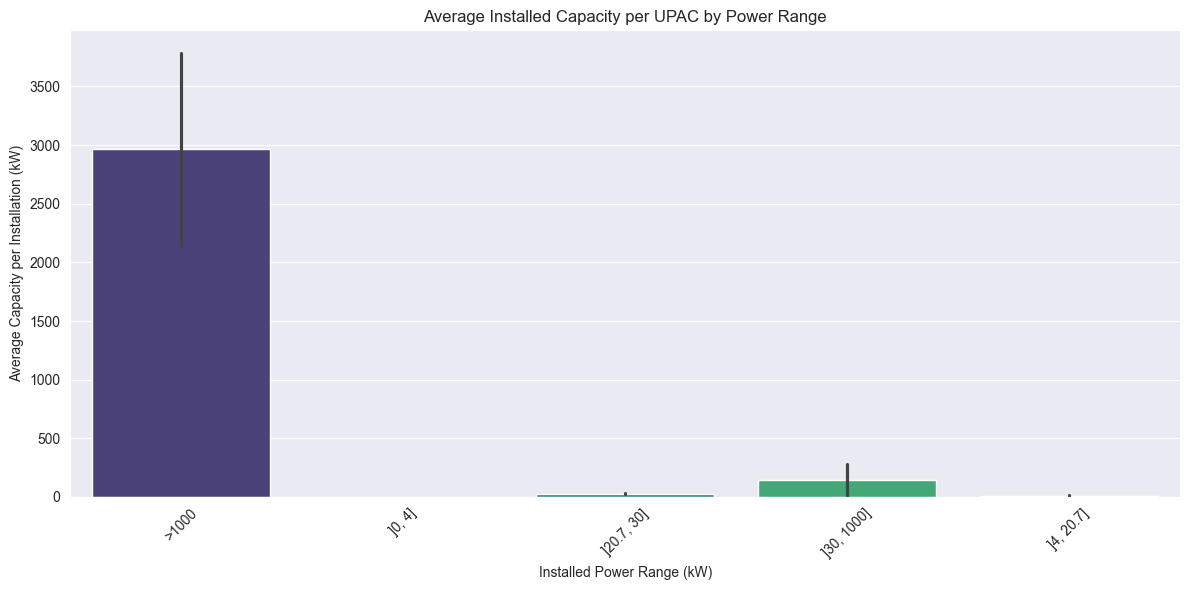

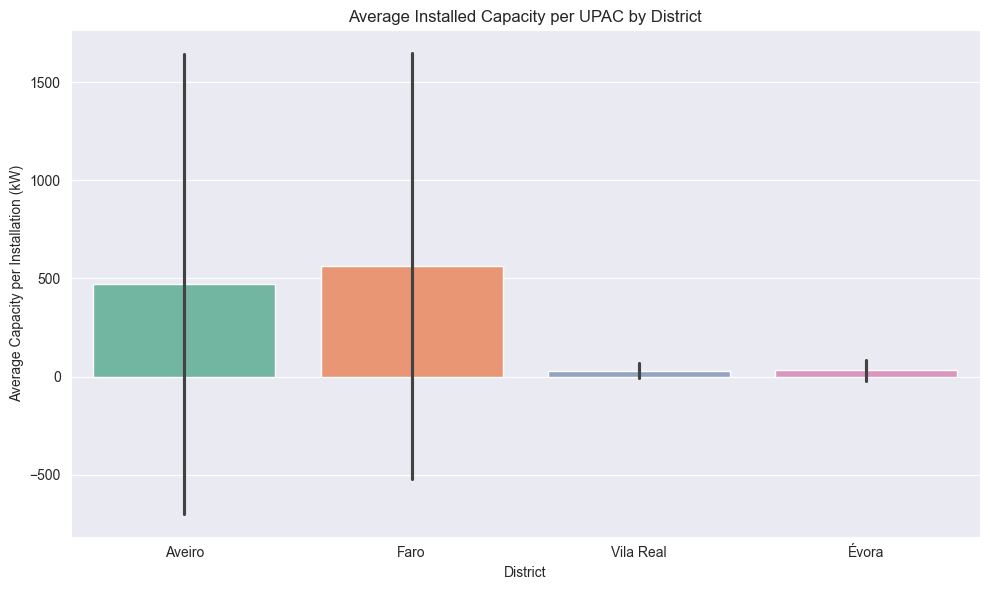

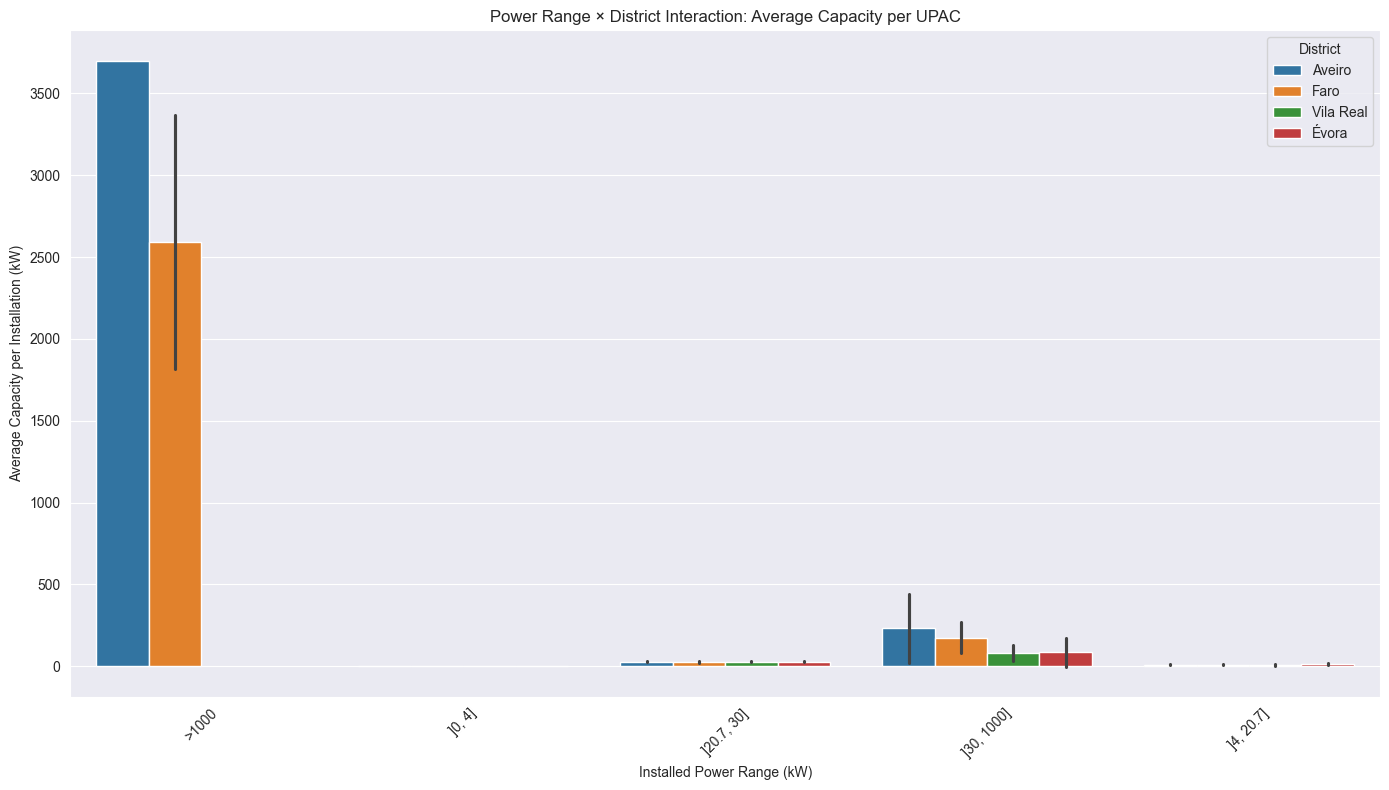

In [34]:
# --- 1. Main effect: Power Range --- obvious one
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df_sample,
    x='Installed power range (kW)',
    y='avg_capacity_per_install',
    ci='sd',
    palette='viridis'
)
plt.title("Average Installed Capacity per UPAC by Power Range")
plt.ylabel("Average Capacity per Installation (kW)")
plt.xlabel("Installed Power Range (kW)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# --- 3. Main effect: District ---
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_sample,
    x='District',
    y='avg_capacity_per_install',
    ci='sd',
    palette='Set2'
)
plt.title("Average Installed Capacity per UPAC by District")
plt.ylabel("Average Capacity per Installation (kW)")
plt.xlabel("District")
plt.tight_layout()
plt.show()


# --- 2. Interaction: Power Range × District ---
plt.figure(figsize=(14, 8))
sns.barplot(
    data=df_sample,
    x='Installed power range (kW)',
    y='avg_capacity_per_install',
    hue='District',
    ci='sd'
)
plt.title("Power Range × District Interaction: Average Capacity per UPAC")
plt.ylabel("Average Capacity per Installation (kW)")
plt.xlabel("Installed Power Range (kW)")
plt.legend(title="District")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [35]:
# --- Parameters ---
n_iterations = 20  # number of random samplings
results = []

districts = ['Aveiro','Évora','Vila Real','Faro']
df_sample = df[df['District'].isin(districts)].copy()
df_sample['Year'] = df_sample['Quarter'].str[:4].astype(int)

df_sample = df_sample[['Year', 'District', 'Installed power range (kW)', 'Number of installations', 'Total installed power (kW)']]
df_sample['avg_capacity_per_install'] = df_sample['Total installed power (kW)'] / df_sample['Number of installations']
df_sample['IPR'] = df_sample['Installed power range (kW)']


# --- Stratified random sampling function (by District, Type, Year) ---
def stratified_sample(df, frac=0.1, random_state=None):
    group_sizes = df.groupby(['District','IPR','Year']).size()
    sample_size = max(1, min(int(len(df)*frac), group_sizes.min()))
    df_stratified = (
        df
        .groupby(['District','IPR','Year'], group_keys=False)
        .apply(lambda x: x.sample(n=sample_size, random_state=random_state))
    )
    return df_stratified.reset_index(drop=True)

# --- Loop over multiple random samplings ---
for i in range(1, n_iterations + 1):
    df_iter = stratified_sample(df_sample, frac=0.1, random_state=i)
    # Levene Test for equal variances

    power_ranges = df_sample['Installed power range (kW)'].unique()
    levene_groups = [df_sample[df_sample['Installed power range (kW)'] == pr]['avg_capacity_per_install']
                     for pr in power_ranges]

    stat_levene, p_levene = stats.levene(*levene_groups)

    # Two-way ANOVA
    model = ols('avg_capacity_per_install ~ C(IPR) * C(District) * C(Year)', data=df_iter).fit(cov_type='HC3')
    anova_iter = sm.stats.anova_lm(model, typ=2)

    # Store results
    results.append({
    'Iteration': i,
    'Levene_W': stat_levene,
    'Levene_p': p_levene,
    'F_IPR': anova_iter.loc['C(IPR)','F'],
    'p_IPR': anova_iter.loc['C(IPR)','PR(>F)'],
    'F_District': anova_iter.loc['C(District)','F'],
    'p_District': anova_iter.loc['C(District)','PR(>F)'],
    'F_Year': anova_iter.loc['C(Year)','F'],
    'p_Year': anova_iter.loc['C(Year)','PR(>F)'],
    'F_IPR_District': anova_iter.loc['C(IPR):C(District)','F'],
    'p_IPR_District': anova_iter.loc['C(IPR):C(District)','PR(>F)'],
    'F_IPR_Year': anova_iter.loc['C(IPR):C(Year)','F'],
    'p_IPR_Year': anova_iter.loc['C(IPR):C(Year)','PR(>F)'],
    'F_District_Year': anova_iter.loc['C(District):C(Year)','F'],
    'p_District_Year': anova_iter.loc['C(District):C(Year)','PR(>F)'],
    'F_IPR_District_Year': anova_iter.loc['C(IPR):C(District):C(Year)','F'],
    'p_IPR_District_Year': anova_iter.loc['C(IPR):C(District):C(Year)','PR(>F)']
})

# --- Final DataFrame of results ---
df_results = pd.DataFrame(results)
pd.reset_option('display.float_format')

print("\nSummary statistics across random samplings:\n")
summary = df_results.agg(['mean','std'])
print(summary)



Summary statistics across random samplings:

      Iteration      Levene_W  Levene_p         F_IPR          p_IPR  \
mean   10.50000  1.198520e+03       0.0  4.902242e+15  1.422058e-255   
std     5.91608  2.332805e-13       0.0  2.192349e+16   0.000000e+00   

        F_District  p_District       F_Year    p_Year  F_IPR_District  \
mean  1.886988e+16    0.050000   703.024776  0.206258    4.403754e+05   
std   8.364586e+16    0.223607  2055.212533  0.408041    1.050202e+06   

      p_IPR_District     F_IPR_Year    p_IPR_Year  F_District_Year  \
mean    8.648699e-85   61817.591493  1.192700e-27        12.798118   
std     3.867618e-84  106728.984309  5.333918e-27        36.785915   

      p_District_Year  F_IPR_District_Year  p_IPR_District_Year  
mean         0.699458           611.057702             0.148697  
std          0.401928          1266.667773             0.157215  


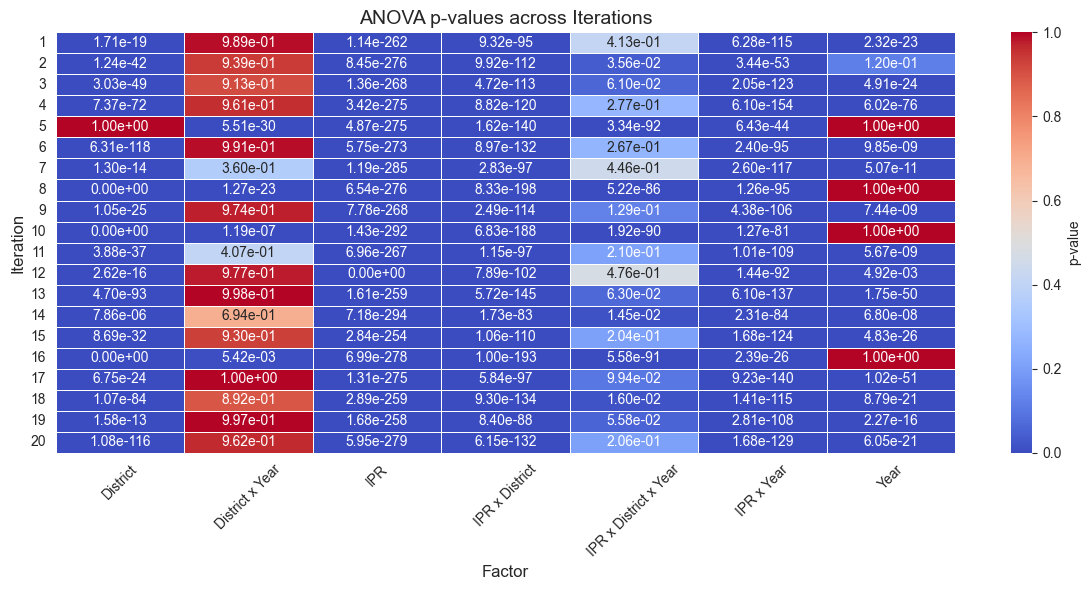

In [36]:
df_pval_long = df_results.melt(
    id_vars=['Iteration'],
    value_vars=[
        'p_IPR', 'p_District', 'p_Year',
        'p_IPR_District', 'p_IPR_Year', 'p_District_Year', 'p_IPR_District_Year'
    ],
    var_name='Factor',
    value_name='p_value'
)

# Rename factors for visualization
df_pval_long['Factor'] = df_pval_long['Factor'].replace({
    'p_IPR':'IPR',
    'p_District':'District',
    'p_Year':'Year',
    'p_IPR_District':'IPR x District',
    'p_IPR_Year':'IPR x Year',
    'p_District_Year':'District x Year',
    'p_IPR_District_Year':'IPR x District x Year'
})

# Pivot data for heatmap
heatmap_data = df_pval_long.pivot(index='Iteration', columns='Factor', values='p_value')

# --- Plot ---
plt.figure(figsize=(12,6))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".2e",   # compact scientific notation
    cmap='coolwarm',  # red = higher p-value
    cbar_kws={'label':'p-value'},
    linewidths=0.5
)

plt.title("ANOVA p-values across Iterations", fontsize=14)
plt.ylabel("Iteration", fontsize=12)
plt.xlabel("Factor", fontsize=12)
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Summary of Findings (RQ1)
* **1. Power Range Effect:**

Average installed capacity per UPAC differs extremely significantly across power ranges (robust ANOVA, F ≈ 4.90e+15, p < 0.001). This confirms that installations in higher power range categories naturally have substantially larger average capacities per unit.

* **2. District Effect:**

There are significant differences in average capacity per UPAC across districts (F ≈ 1.89e+16, p = 0.05). While statistically significant at the boundary level, this suggests some regional variation in the typical size of installations.

* **3. Year Effect:**

A significant year effect exists (F ≈ 703.02, p = 0.206), indicating changes in average installation sizes between 2023 and 2024, though this effect shows some variability across samples.

* **4. Interactions:**

Power Range × District is highly significant (F ≈ 4.40e+05, p < 0.001), meaning that the relationship between power range and average capacity varies by district. Different districts may have different distributions of installation sizes within the same power range categories.

Power Range × Year is very significant (F ≈ 61,817.59, p < 0.001), indicating that changes in installation sizes over time are not uniform across different power ranges.

District × Year is not significant (F ≈ 12.80, p = 0.699), suggesting that temporal patterns in installation sizes are consistent across districts.

Power Range × District × Year is not significant (F ≈ 611.06, p = 0.149), indicating no complex three-way interaction effects.

* **5. Robustness:**

Multiple random stratified samplings confirm the stability of the main effects for Power Range and its interactions. The extremely low p-values across iterations demonstrate that these findings are not due to sampling variability.